### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(filepath_or_buffer='winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


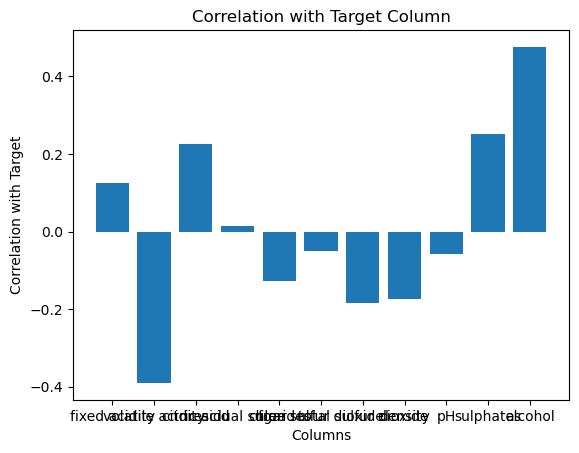

In [2]:
# Calculate the correlation between each column and the last column (Target column)
correlations = df.corr()['quality']

# Plot the correlations using a bar plot
plt.bar(correlations.index[:-1], correlations[:-1])
plt.xlabel("Columns")
plt.ylabel("Correlation with Target")
plt.title("Correlation with Target Column")
plt.show()

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [3]:
df.shape

(1599, 12)

In [4]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

#### There is no null data in the dataset

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# If We Change min value of any attribute
def replace_na_with_mean(df):
  """Replaces all `na` values in `df` with the mean of the column."""
  for column in df.columns:
    mean = df[column].mean()
    df[column].replace(df[column].min(), mean, inplace=True)
    
  return df
replaced_df = replace_na_with_mean(df)
replaced_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.321964,0.528586,0.293345,2.540855,0.087561,15.902830,46.543717,0.996755,3.311470,0.658354,10.425513,5.652508
std,1.738607,0.178184,0.177148,1.408734,0.046989,10.440245,32.848473,0.001872,0.153724,0.169308,1.063259,0.780009
min,4.700000,0.160000,0.010000,1.200000,0.034000,2.000000,7.000000,0.990200,2.860000,0.370000,8.500000,4.000000
25%,7.100000,0.390000,0.150000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.270976,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### if we forcefully impute dataset then it change the database file.

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

    - The factors that affect students' performance in exams can be diverse and influenced by various individual, environmental, and educational factors. Some key factors that commonly play a role include:

1. **Study Habits and Time Management:** Students' study habits, time management skills, and dedication to their studies can significantly impact their exam performance.

2. **Prior Knowledge and Background:** Students' prior knowledge, academic background, and understanding of the subject matter can influence how well they perform in exams.

3. **Class Attendance and Participation:** Regular class attendance and active participation in classroom activities can positively affect exam performance.

4. **Motivation and Interest:** Students who are motivated and have a genuine interest in the subject tend to perform better in exams.

5. **Test Anxiety and Stress:** High levels of test anxiety and stress can negatively impact exam performance.

6. **Teacher Quality and Teaching Methods:** The quality of teaching and the effectiveness of teaching methods can affect students' understanding and retention of course material.

7. **Parental Involvement and Support:** The involvement and support of parents or guardians in a student's academic life can play a crucial role in their exam performance.

8. **Access to Educational Resources:** Access to resources such as textbooks, online materials, and educational support can influence students' ability to prepare for exams.

To analyze the factors that affect students' performance in exams using statistical techniques, you can follow these steps:

1. **Data Collection:** Gather data on students' exam scores and various potential factors that may influence performance, such as study habits, class attendance, motivation levels, etc.

2. **Data Cleaning and Preprocessing:** Clean the data, handle missing values, and preprocess it in preparation for analysis.

3. **Descriptive Statistics:** Calculate summary statistics (e.g., mean, median, standard deviation) for the exam scores and other factors to gain initial insights.

4. **Correlation Analysis:** Use correlation analysis to identify relationships between exam scores and potential influencing factors. This will help identify which factors are more strongly associated with exam performance.

5. **Regression Analysis:** Conduct regression analysis to model the relationship between the dependent variable (exam scores) and independent variables (potential influencing factors). This can help quantify the impact of each factor on exam performance while controlling for other variables.

6. **Hypothesis Testing:** Use hypothesis testing to assess the significance of relationships between the variables. This will help determine whether the observed associations are statistically significant.

7. **Data Visualization:** Create visualizations, such as scatter plots, bar charts, or box plots, to visualize the relationships and distributions of the variables.

8. **Machine Learning:** Consider using machine learning algorithms, such as decision trees or random forests, to predict students' exam performance based on the identified factors.

9. **Causal Analysis (if possible):** If causal relationships are of interest, consider conducting experimental studies or quasi-experimental designs to establish causality between factors and exam performance.

10. **Interpretation and Reporting:** Interpret the results and communicate findings in a clear and meaningful way.

By following these steps, we can gain insights into the factors that most strongly influence students' performance in exams. The results can be valuable for educators, policymakers, and students themselves to understand how to improve academic outcomes and support student success.

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

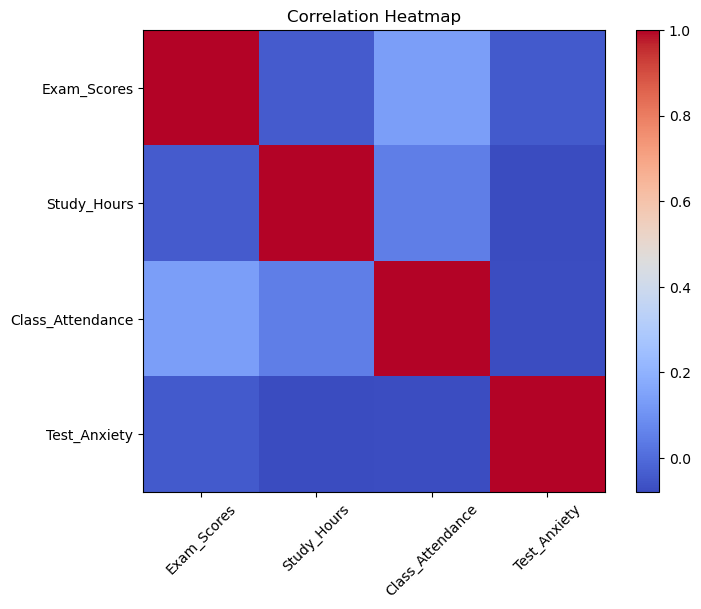

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for students' exam performance and potential factors
np.random.seed(42)
num_students = 100
exam_scores = np.random.randint(40, 100, num_students)
study_hours = np.random.uniform(1, 8, num_students)
class_attendance = np.random.uniform(70, 100, num_students)
test_anxiety = np.random.uniform(1, 5, num_students)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Exam_Scores': exam_scores,
    'Study_Hours': study_hours,
    'Class_Attendance': class_attendance,
    'Test_Anxiety': test_anxiety
})

# Calculate correlation matrix to identify relationships between variables
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()


       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


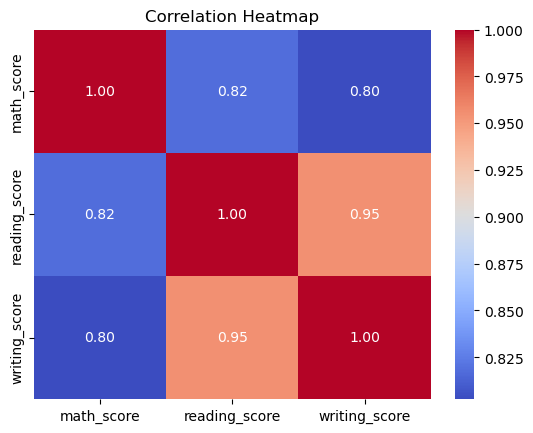

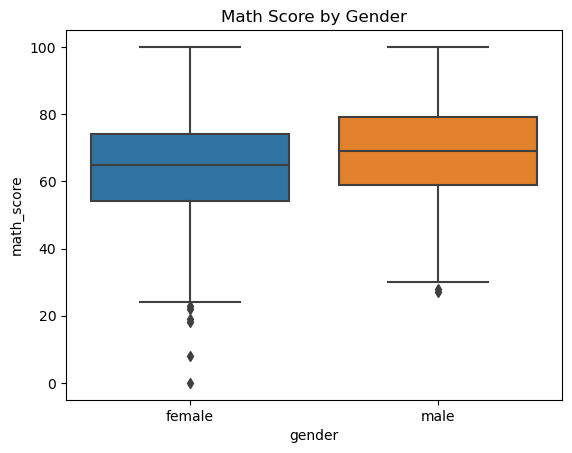

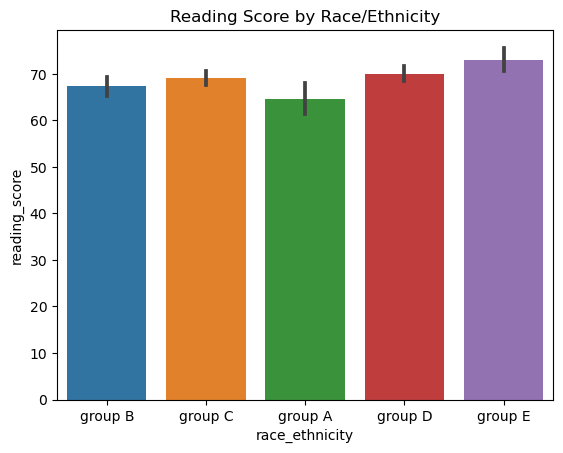

t-statistic: 5.383245869828983
p-value: 9.120185549328822e-08
F-statistic: 14.593885166332635
p-value (ANOVA): 1.3732194030370688e-11


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Load the dataset
data = pd.read_csv('stud.csv')

# Summary statistics
print(data.describe())

# Correlation matrix
correlation_matrix = data[['math_score', 'reading_score', 'writing_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Data visualization
sns.boxplot(x='gender', y='math_score', data=data)
plt.title("Math Score by Gender")
plt.show()

sns.barplot(x='race_ethnicity', y='reading_score', data=data)
plt.title("Reading Score by Race/Ethnicity")
plt.show()

# Hypothesis testing
gender_grouped = data.groupby('gender')
male_scores = data[data['gender'] == 'male']['math_score']
female_scores = data[data['gender'] == 'female']['math_score']

t_statistic, p_value = ttest_ind(male_scores, female_scores)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

race_groups = [group['math_score'] for name, group in data.groupby('race_ethnicity')]
f_statistic, p_value_anova = f_oneway(*race_groups)
print("F-statistic:", f_statistic)
print("p-value (ANOVA):", p_value_anova)


### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


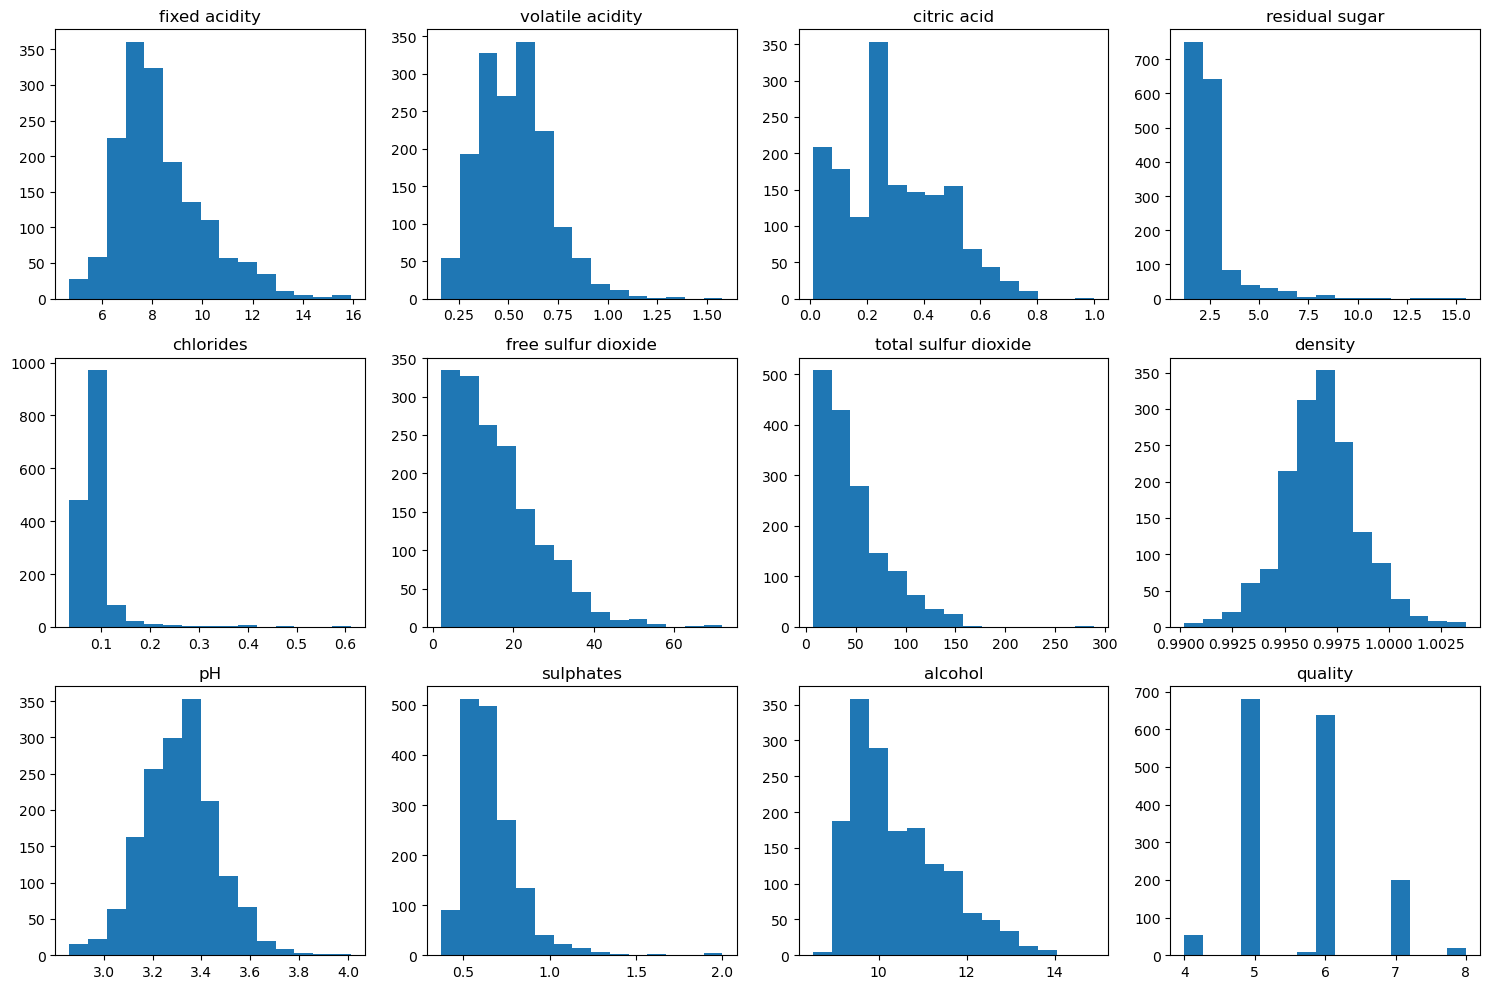

In [10]:
# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.hist(df[column], bins=15)
    plt.title(column)
plt.tight_layout()
plt.show()

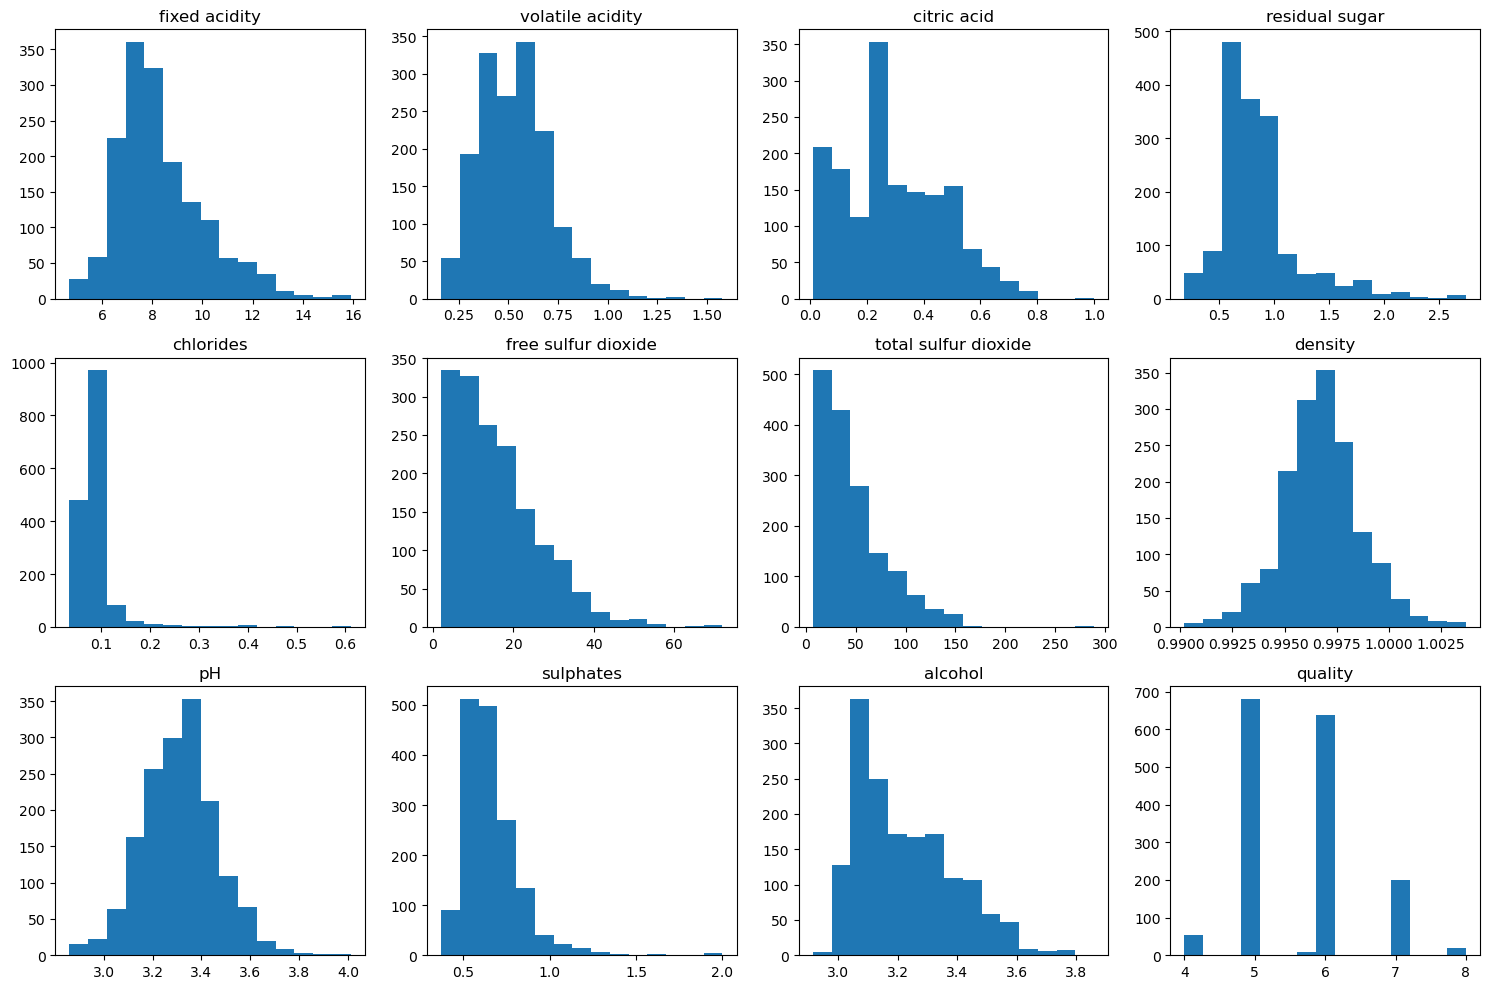

In [11]:
# Apply transformations to improve normality
df['residual sugar'] = df['residual sugar'].apply(lambda x: np.log(x))
df['alcohol'] = df['alcohol'].apply(lambda x: np.sqrt(x))

# Plot histograms after transformations
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.hist(df[column], bins=15)
    plt.title(column)
plt.tight_layout()
plt.show()


**In this updated visualization, we can observe that the transformed "residual sugar" and "alcohol" features appear to have more symmetrical distributions, indicating an improvement in normality.**






Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [12]:
from sklearn.decomposition import PCA

In [13]:
# Perform PCA
pca = PCA()
pca.fit(df)

# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components to explain 90% of the variance
num_components_90_variance = np.argmax(cumulative_variance >= 0.9) + 1

print("Cumulative Explained Variance Ratio:")
print(cumulative_variance)
print("Number of Principal Components to explain 90% of variance:", num_components_90_variance)

Cumulative Explained Variance Ratio:
[0.94819703 0.99682322 0.99933316 0.99981731 0.99991507 0.99994465
 0.99996416 0.99998063 0.99999013 0.99999878 1.         1.        ]
Number of Principal Components to explain 90% of variance: 1
